<a href="https://colab.research.google.com/github/UnitForDataScience/Homelessness_Clustering_Comparisons/blob/master/Homelessness_Clustering_Algorithm_Comparisons_(Unsupervised_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

OBJECTIVE

In [1]:
import pandas as pd
import numpy as np
import time

print('Imports completed successfully')

Imports completed successfully


# Data Import

DATA DESCRIPTION

In [2]:
# Data load

url = 'https://raw.githubusercontent.com/djlittle/Homelessness_Clustering_Comparisons/master/Data/HMIS%20Data%20Extract.csv'

dat = pd.read_csv(url)

print(dat.head())


   personalid  ...  projecttype_14_count
0         342  ...                   2.0
1         401  ...                   1.0
2         402  ...                   1.0
3         424  ...                   NaN
4         438  ...                   NaN

[5 rows x 13 columns]


In [3]:
# Dataframe manipulation and nan handling

processing_times = pd.DataFrame()  # For assessing each algorithm's processing times

df = dat.iloc[:, 1:]
df.fillna(-1, inplace=True)

print(df.head())

   projecttype_1_bednights  ...  projecttype_14_count
0                     91.0  ...                   2.0
1                      2.0  ...                   1.0
2                     -1.0  ...                   1.0
3                      5.0  ...                  -1.0
4                    220.0  ...                  -1.0

[5 rows x 12 columns]


# KMEANS Model

In [4]:
# Kmeans 

from sklearn.cluster import KMeans

start = time.time()
kmeans = KMeans(n_clusters=10, verbose=True, n_jobs=-1).fit(df)
kmeans_labels = kmeans.labels_ + 1
end = time.time()

processing_times['kmeans'] = [(end - start)]

dat['kmeans'] = kmeans_labels

print('Kmeans model complete')
print('Processing time: '+ str(processing_times['kmeans'][0]) + ' seconds')

Kmeans model complete
Processing time: 2.4509408473968506 seconds


# DBSCAN Model

In [5]:
# DBSCAN 

from sklearn.cluster import DBSCAN

start = time.time()
dbscan = DBSCAN(eps=2.5, min_samples=10, n_jobs=-1).fit(df)
dbscan_labels = dbscan.labels_ + 1
end = time.time()

processing_times['dbscan'] = [(end - start)]

dat['dbscan'] = dbscan_labels

print('DBSCAN model complete')
print('Processing time: '+ str(processing_times['dbscan'][0]) + ' seconds')


DBSCAN model complete
Processing time: 11.435936450958252 seconds


# BIRCH Model

In [6]:
# Birch algorithm

from sklearn.cluster import Birch

start = time.time()
birch = Birch(branching_factor=1000, n_clusters=10, threshold=1.5).fit(df)
birch_labels = birch.labels_+1
end = time.time()

processing_times['birch'] = [(end - start)]

dat['birch'] = birch_labels

print('BIRCH model complete')
print('Processing time: '+ str(processing_times['birch'][0]) + ' seconds')

BIRCH model complete
Processing time: 2.5514228343963623 seconds


# Performance and Cluster Results

In [7]:
# Comparing clusters

print(processing_times)

unique, counts = np.unique(kmeans_labels, return_counts=True)
kmeans_clusters = dict(zip(unique, counts))
print(kmeans_clusters)

unique, counts = np.unique(dbscan_labels, return_counts=True)
dbscan_clusters = dict(zip(unique, counts))
print(dbscan_clusters)

unique, counts = np.unique(birch_labels, return_counts=True)
birch_clusters = dict(zip(unique, counts))
print(birch_clusters)

     kmeans     dbscan     birch
0  2.450941  11.435936  2.551423
{1: 22788, 2: 1134, 3: 134, 4: 1510, 5: 41, 6: 60, 7: 2022, 8: 430, 9: 1113, 10: 113}
{0: 1653, 1: 7991, 2: 19508, 3: 26, 4: 29, 5: 56, 6: 11, 7: 11, 8: 19, 9: 10, 10: 11, 11: 10, 12: 10}
{1: 54, 2: 1676, 3: 375, 4: 1878, 5: 222, 6: 24453, 7: 48, 8: 547, 9: 41, 10: 51}


# Hyperparameter Optimization

As a secondary task, build a framework that optimizes the parameters of any of the cultersing algorithms implimented above.

# Optimal Cluster Size Assessment


Beginning k = 2
Beginning k = 3
Beginning k = 4
Beginning k = 5
Beginning k = 6
Beginning k = 7
Beginning k = 8
Beginning k = 9
Beginning k = 10
Beginning k = 11
Beginning k = 12
Beginning k = 13
Beginning k = 14
Beginning k = 15
Beginning k = 16
Beginning k = 17
Beginning k = 18
Beginning k = 19
Beginning k = 20
Beginning k = 21
Beginning k = 22
Beginning k = 23
Beginning k = 24
Beginning k = 25
Beginning k = 26
Beginning k = 27
Beginning k = 28
Beginning k = 29
Beginning k = 30
Beginning k = 31
Beginning k = 32
Beginning k = 33
Beginning k = 34
Beginning k = 35
Beginning k = 36
Beginning k = 37
Beginning k = 38
Beginning k = 39
Beginning k = 40
Beginning k = 41
Beginning k = 42
Beginning k = 43
Beginning k = 44
Beginning k = 45
Beginning k = 46
Beginning k = 47
Beginning k = 48
Beginning k = 49


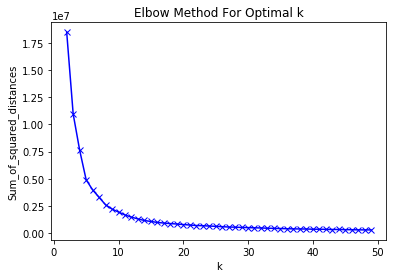

In [8]:
from matplotlib import pyplot as plt

wcss = []
K = range(2, 50)
for k in K:
    print("Beginning k = " + str(k))
    kmeans = KMeans(n_clusters=k, n_jobs=None).fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Distance Metric Evaluation

The distance function can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’

Random sample is executed to simplify visualizations. 